<h1 style="color:black">1. Importing Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import joblib
import tldextract
from urllib.parse import urlparse, urlunparse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
from collections import Counter
import time

<h1 style="color:black">2. Loading Dataset</h1>

In [2]:
df = pd.read_csv("urldata.csv", dtype={"url": str, "type": str}, low_memory=False)
df.head(10)

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
5,5,https://www.reddit.com,benign,0
6,6,https://www.yahoo.com,benign,0
7,7,https://www.google.co.in,benign,0
8,8,https://www.qq.com,benign,0
9,9,https://www.amazon.com,benign,0


<h1 style="color:black">3. Data Preprocessing</h1>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  450176 non-null  int64 
 1   url         450176 non-null  object
 2   label       450176 non-null  object
 3   result      450176 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 13.7+ MB


count = df['label'].value_counts()
colors = [
    '#14A8DC', '#ebe465', '#eb361a', '#3fba20'
]
fig = go.Figure(data=[go.Bar(x=count.index, y=count, marker=dict(color=colors))])
fig.update_layout(
    xaxis_title='Types',
    yaxis_title='Count',
    title='Count of Different Types of URLs',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(tickfont=dict(color='white'))
fig.update_yaxes(tickfont=dict(color='white'))
fig.show()

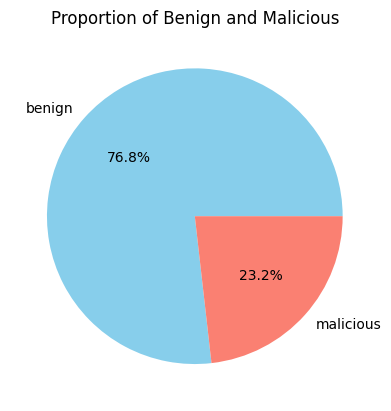

In [4]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%', labels=['benign','malicious'], colors=['skyblue', 'salmon'])
plt.title("Proportion of Benign and Malicious")
plt.ylabel("")
plt.show()

In [5]:
df["label"].value_counts()

label
benign       345738
malicious    104438
Name: count, dtype: int64

In [6]:
i = 0
for u in df["url"]:
    i += 1
    if "[.]" in str(u):
        print(f"{u}, index = {i}")
    else:
        pass

http://ladiesfirst-privileges[.]com/656465/d5678h9.exe, index = 397557


In [7]:
df.loc[df['url'] == 'http://ladiesfirst-privileges[.]com/656465/d5678h9.exe', 'url'] = 'http://ladiesfirst-privileges.com/656465/d5678h9.exe'
i = 0
for u in df["url"]:
    i += 1
    if "[.]" in str(u):
        print(f"{u}, index = {i}")
    else:
        pass

In [8]:
def normalize_url(url):
        parsed = urlparse(url)
        path = '' if parsed.path == '/' else parsed.path
        normalized = urlunparse(parsed._replace(path=path))
        return normalized

df['url'] = df['url'].apply(normalize_url)
df.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [9]:
def url_len(url):
    return len(url)

In [10]:
df['url_length'] = df['url'].apply(lambda x: url_len(str(x)))
df.head(-1)

,Unnamed: 0,url,label,result,url_length
0,0,https://www.google.com,benign,0,22
1,1,https://www.youtube.com,benign,0,23
2,2,https://www.facebook.com,benign,0,24
3,3,https://www.baidu.com,benign,0,21
4,4,https://www.wikipedia.org,benign,0,25
...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147


In [11]:
def count_dots(url):
    return url.count(".")

In [12]:
df['num_dots'] = df['url'].apply(lambda x: count_dots(str(x)))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots
0,0,https://www.google.com,benign,0,22,2
1,1,https://www.youtube.com,benign,0,23,2
2,2,https://www.facebook.com,benign,0,24,2
3,3,https://www.baidu.com,benign,0,21,2
4,4,https://www.wikipedia.org,benign,0,25,2
...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1


In [13]:
def count_hyphens(url):
    return url.count("-")

In [14]:
df['num_hyphens'] = df['url'].apply(lambda x: count_hyphens(str(x)))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens
0,0,https://www.google.com,benign,0,22,2,0
1,1,https://www.youtube.com,benign,0,23,2,0
2,2,https://www.facebook.com,benign,0,24,2,0
3,3,https://www.baidu.com,benign,0,21,2,0
4,4,https://www.wikipedia.org,benign,0,25,2,0
...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0


In [15]:
def count_slash(url):
    return url.count("/") - 2

In [16]:
df['num_slash'] = df['url'].apply(lambda x: count_slash(str(x)))
#df.query("label == 'benign' and num_slash == 1")
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash
0,0,https://www.google.com,benign,0,22,2,0,0
1,1,https://www.youtube.com,benign,0,23,2,0,0
2,2,https://www.facebook.com,benign,0,24,2,0,0
3,3,https://www.baidu.com,benign,0,21,2,0,0
4,4,https://www.wikipedia.org,benign,0,25,2,0,0
...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12


In [17]:
def count_digits(url):
    return sum(c.isdigit() for c in url)

In [18]:
df['num_digits'] = df['url'].apply(lambda x: count_digits(str(x)))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits
0,0,https://www.google.com,benign,0,22,2,0,0,0
1,1,https://www.youtube.com,benign,0,23,2,0,0,0
2,2,https://www.facebook.com,benign,0,24,2,0,0,0
3,3,https://www.baidu.com,benign,0,21,2,0,0,0
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0
...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20


In [19]:
def contains_valid_ip(url):
    try:
        if not isinstance(url, str) or url.strip() == '':
            return False
        parsed = urlparse(url)
        domain = parsed.netloc
        # Fall back if netloc is empty (in some malformed URLs, it's in path)
        if not domain:
            domain = parsed.path
        for part in domain.replace('[', '').replace(']', '').split('.'):
            try:
                ipaddress.ip_address(part)
                return True
            except ValueError:
                continue
        return False
    except Exception:
        return False

In [20]:
df['has_ip_address'] = df['url'].apply(lambda x: int(contains_valid_ip(x)))
#df.query("has_ip_address == True")
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address
0,0,https://www.google.com,benign,0,22,2,0,0,0,0
1,1,https://www.youtube.com,benign,0,23,2,0,0,0,0
2,2,https://www.facebook.com,benign,0,24,2,0,0,0,0
3,3,https://www.baidu.com,benign,0,21,2,0,0,0,0
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0


In [21]:
def pre_of_a(url):
    return "@" in url

In [22]:
df['presence_of_a'] = df['url'].apply(lambda x: int(pre_of_a(str(x))))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,presence_of_a
0,0,https://www.google.com,benign,0,22,2,0,0,0,0,0
1,1,https://www.youtube.com,benign,0,23,2,0,0,0,0,0
2,2,https://www.facebook.com,benign,0,24,2,0,0,0,0,0
3,3,https://www.baidu.com,benign,0,21,2,0,0,0,0,0
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0,0
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0,0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0,0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0,0


In [23]:
def https(url):
    return url.startswith("https://")

In [24]:
df['uses_https'] = df['url'].apply(lambda x: int(https(str(x))))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,presence_of_a,uses_https
0,0,https://www.google.com,benign,0,22,2,0,0,0,0,0,1
1,1,https://www.youtube.com,benign,0,23,2,0,0,0,0,0,1
2,2,https://www.facebook.com,benign,0,24,2,0,0,0,0,0,1
3,3,https://www.baidu.com,benign,0,21,2,0,0,0,0,0,1
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0,0,1
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0,0,0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0,0,0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0,0,0


In [25]:
def num_subdomains(url):
    ext = tldextract.extract(url)
    return len(ext.subdomain.split('.')) if ext.subdomain else 0

In [26]:
df['num_subdomains'] = df['url'].apply(lambda x: num_subdomains(str(x)))
#df.head(-1)
df.query("label == 'malicious' and num_subdomains == 0")

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,presence_of_a,uses_https,num_subdomains
345738,345738,http://atualizacaodedados.online,malicious,1,32,1,0,0,0,0,0,0,0
345741,345741,https://tubuh-syarikat.com/plugins/fields/files/,malicious,1,48,1,1,4,0,0,0,1,0
345742,345742,http://rolyborgesmd.com/exceword/excel.php?.ra...,malicious,1,70,4,0,2,2,0,0,0,0
345747,345747,http://chronopost-service-enligne.net/56123s/r...,malicious,1,128,2,2,6,21,0,0,0,0
345748,345748,http://chronopost-service-enligne.net/56123s/r...,malicious,1,116,1,2,6,20,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0,0,0,0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0,0,0,0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0,0,0,0
450174,450174,http://atualizapj.com,malicious,1,21,1,0,0,0,0,0,0,0


In [27]:
def path_length(url):
    try:
        parse = urlparse(url)
        return len(parse.path)
    except Exception:
        return 0

In [28]:
df['path_length'] = df['url'].apply(lambda x: path_length(str(x)))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,presence_of_a,uses_https,num_subdomains,path_length
0,0,https://www.google.com,benign,0,22,2,0,0,0,0,0,1,1,0
1,1,https://www.youtube.com,benign,0,23,2,0,0,0,0,0,1,1,0
2,2,https://www.facebook.com,benign,0,24,2,0,0,0,0,0,1,1,0
3,3,https://www.baidu.com,benign,0,21,2,0,0,0,0,0,1,1,0
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0,0,1,0,26
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0,0,0,0,25
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0,0,0,0,139
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0,0,0,0,127


In [29]:
def pres_of_www(url):
    try:
        parse = urlparse(url)
        return "www." in parse.netloc
    except Exception as e:
        print(f"Error parsing URL: {url} — {e}")
        return False

In [30]:
df['presence_of_www'] = df['url'].apply(lambda x: int(pres_of_www(str(x))))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,presence_of_a,uses_https,num_subdomains,path_length,presence_of_www
0,0,https://www.google.com,benign,0,22,2,0,0,0,0,0,1,1,0,1
1,1,https://www.youtube.com,benign,0,23,2,0,0,0,0,0,1,1,0,1
2,2,https://www.facebook.com,benign,0,24,2,0,0,0,0,0,1,1,0,1
3,3,https://www.baidu.com,benign,0,21,2,0,0,0,0,0,1,1,0,1
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0,0,1,0,26,0
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0,0,0,0,25,0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0,0,0,0,139,0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0,0,0,0,127,0


In [31]:
def len_domain(url):
    ext = tldextract.extract(url)
    return len(ext.domain)

In [32]:
df['length_of_domain'] = df['url'].apply(lambda x: len_domain(str(x)))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,presence_of_a,uses_https,num_subdomains,path_length,presence_of_www,length_of_domain
0,0,https://www.google.com,benign,0,22,2,0,0,0,0,0,1,1,0,1,6
1,1,https://www.youtube.com,benign,0,23,2,0,0,0,0,0,1,1,0,1,7
2,2,https://www.facebook.com,benign,0,24,2,0,0,0,0,0,1,1,0,1,8
3,3,https://www.baidu.com,benign,0,21,2,0,0,0,0,0,1,1,0,1,5
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0,0,0,1,1,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0,0,1,0,26,0,6
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0,0,0,0,25,0,7
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0,0,0,0,139,0,9
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0,0,0,0,127,0,9


In [33]:
def sen_kw(url):
    return int(any(word in url.lower() for word in ["login", "secure", "bank", "update", "verify"]))

In [34]:
df['has_sensitive_keyword'] = df['url'].apply(lambda x: sen_kw(str(x)))
#df.query("has_sensitive_keyword == 1")
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,presence_of_a,uses_https,num_subdomains,path_length,presence_of_www,length_of_domain,has_sensitive_keyword
0,0,https://www.google.com,benign,0,22,2,0,0,0,0,0,1,1,0,1,6,0
1,1,https://www.youtube.com,benign,0,23,2,0,0,0,0,0,1,1,0,1,7,0
2,2,https://www.facebook.com,benign,0,24,2,0,0,0,0,0,1,1,0,1,8,0
3,3,https://www.baidu.com,benign,0,21,2,0,0,0,0,0,1,1,0,1,5,0
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0,0,0,1,1,0,1,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0,0,1,0,26,0,6,0
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0,0,0,0,25,0,7,0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0,0,0,0,139,0,9,0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0,0,0,0,127,0,9,0


In [35]:
def get_tld_from_url(url):
    ext = tldextract.extract(url)
    return ext.suffix

tld_list = []
for index, row in df.iterrows():
    if row['label'] == 'malicious':
        e = get_tld_from_url(str(row['url']))
        if e not in tld_list:
            tld_list.append(e)
for index, row in df.iterrows():
    if row['label'] == 'benign':
        e = get_tld_from_url(str(row['url']))
        if e in tld_list:
            tld_list.remove(e)

def sus_tld(url):
    ext = tldextract.extract(url)
    ext_list = tld_list + ["xyz", "info", "top", "tk", "buzz", "ga", "ml", "cf", "gq"]
    return ext.suffix in ext_list

In [36]:
df['suspicious_tld'] = df['url'].apply(lambda x: int(sus_tld(str(x))))
df.query("label == 'malicious' and suspicious_tld == 1")
#df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,presence_of_a,uses_https,num_subdomains,path_length,presence_of_www,length_of_domain,has_sensitive_keyword,suspicious_tld
345754,345754,http://www.tevhidigundem.ml/login/,malicious,1,34,2,0,2,0,0,0,0,1,7,1,13,1,1
345756,345756,https://paypal.de-vorgangs-nummer-p361.info/51...,malicious,1,146,3,3,7,34,0,0,1,1,103,0,23,0,1
345781,345781,http://filharmonija.mk/Confirm/Account/billing,malicious,1,46,1,0,3,0,0,0,0,0,24,0,12,0,1
345782,345782,https://sercure-pagealert.cf?checkpoint=facebo...,malicious,1,61,2,1,1,0,0,0,1,0,0,0,17,0,1
345783,345783,https://sercure-pagealert.cf,malicious,1,28,1,1,0,0,0,0,1,0,0,0,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450115,450115,http://sumicsow.gq/mmmm/Arizonapage1/ssn-0.htm,malicious,1,46,2,1,3,2,0,0,0,0,28,0,8,0,1
450133,450133,http://62.141.45.54/portaleTitolare10/,malicious,1,38,3,0,2,11,0,0,0,0,19,0,12,0,1
450136,450136,http://www.visaofakebook.info,malicious,1,29,2,0,0,0,0,0,0,1,0,1,13,0,1
450167,450167,http://bishopinegypt.gdn/wp-database/wp-databa...,malicious,1,56,2,2,3,1,0,0,0,0,32,0,13,0,1


In [37]:
def is_short(url):
    try:
        parse = urlparse(url)
        domain = parse.netloc.lower()
        shortened_domains = ["tinyurl.com", "bit.ly", "goo.gl", "t.co", "ow.ly", "is.gd", "buff.ly", "adf.ly"]
        return domain in shortened_domains
    except Exception as e:
        print(f"Error parsing URL: {url} -> {e}")
        return False

In [38]:
df['is_shortened'] = df['url'].apply(lambda x: int(is_short(str(x))))
df.query("is_shortened == 1")
#df.head(-10)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,presence_of_a,uses_https,num_subdomains,path_length,presence_of_www,length_of_domain,has_sensitive_keyword,suspicious_tld,is_shortened
345894,345894,https://tinyurl.com/yapuoo7f,malicious,1,28,1,0,1,1,0,0,1,0,9,0,7,0,0,1
346046,346046,http://bit.ly/2CSm2gc,malicious,1,21,1,0,1,2,0,0,0,0,8,0,3,0,0,1
346066,346066,https://tinyurl.com/y9refvy6,malicious,1,28,1,0,1,2,0,0,1,0,9,0,7,0,0,1
346177,346177,https://t.co/SingcAr1bM,malicious,1,23,1,0,1,1,0,0,1,0,11,0,1,0,0,1
346301,346301,http://bit.ly/2COc2YG,malicious,1,21,1,0,1,2,0,0,0,0,8,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449906,449906,https://t.co/KnlWoZHDua,malicious,1,23,1,0,1,0,0,0,1,0,11,0,1,0,0,1
450011,450011,http://bit.ly/2mOm54O,malicious,1,21,1,0,1,3,0,0,0,0,8,0,3,0,0,1
450057,450057,http://tinyurl.com/lvnndze,malicious,1,26,1,0,1,0,0,0,0,0,8,0,7,0,0,1
450094,450094,http://bit.ly/2nYPBVw,malicious,1,21,1,0,1,1,0,0,0,0,8,0,3,0,0,1


In [39]:
def dig_char_ratio(url):
    return sum(c.isdigit() for c in url) / len(url)

In [40]:
df['digit_to_char_ratio'] = df['url'].apply(lambda x: dig_char_ratio(str(x)))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,presence_of_a,uses_https,num_subdomains,path_length,presence_of_www,length_of_domain,has_sensitive_keyword,suspicious_tld,is_shortened,digit_to_char_ratio
0,0,https://www.google.com,benign,0,22,2,0,0,0,0,0,1,1,0,1,6,0,0,0,0.000000
1,1,https://www.youtube.com,benign,0,23,2,0,0,0,0,0,1,1,0,1,7,0,0,0,0.000000
2,2,https://www.facebook.com,benign,0,24,2,0,0,0,0,0,1,1,0,1,8,0,0,0,0.000000
3,3,https://www.baidu.com,benign,0,21,2,0,0,0,0,0,1,1,0,1,5,0,0,0,0.000000
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0,0,0,1,1,0,1,9,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0,0,1,0,26,0,6,0,1,0,0.113636
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0,0,0,0,25,0,7,0,0,0,0.000000
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0,0,0,0,139,0,9,0,0,0,0.132075
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0,0,0,0,127,0,9,0,0,0,0.136054


import os

def get_ext_from_url(url):
    path = urlparse(url).path 
    _, extension = os.path.splitext(path) 
    return extension

ext_list = []
for u in df["url"]:
    e = get_ext_from_url(str(u))
    if e in ext_list:
        pass
    else:
        ext_list.append(e)

new_list = []
for a in ext_list:
    new_list.append(f"{str(a)}")
#print(new_list)

def sus_ext(url):
    extlist = [".exe", ".zip", ".apk", ".scr", ".php", ".jpg", ".png", ".gif", ".js", ".css", ".pdf", ".doc", ".docx", ".xls", ".xlsx", ".ppt", ".pptx"]
    extlist.append(new_list)
    return int(any(str(ext) in url for ext in extlist))

In [41]:
def sus_ext(url):
    extlist = [".exe", ".zip", ".apk", ".scr", ".php", ".jpg", ".png", ".gif", ".js", ".css", ".pdf", ".doc", ".docx", ".xls", ".xlsx", ".ppt", ".pptx"]
    return int(any(ext in url for ext in extlist))

In [42]:
df['suspicious_extension'] = df['url'].apply(lambda x: sus_ext(str(x)))
df.query("suspicious_extension == 1")
#df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,...,uses_https,num_subdomains,path_length,presence_of_www,length_of_domain,has_sensitive_keyword,suspicious_tld,is_shortened,digit_to_char_ratio,suspicious_extension
265,265,https://www.scribd.com,benign,0,22,2,0,0,0,0,...,1,1,0,1,6,0,0,0,0.000000,1
308,308,https://www.zippyshare.com,benign,0,26,2,0,0,0,0,...,1,1,0,1,10,0,0,0,0.000000,1
674,674,https://www.jsmentry.com,benign,0,24,2,0,0,0,0,...,1,1,0,1,8,0,0,0,0.000000,1
1259,1259,https://www.php.net,benign,0,19,2,0,0,0,0,...,1,1,0,1,3,0,0,0,0.000000,1
1597,1597,https://www.apkpure.com,benign,0,23,2,0,0,0,0,...,1,1,0,1,7,0,0,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450159,450159,http://ayareview-document.pdf-iso.webapps-secu...,malicious,1,100,5,4,2,5,0,...,0,4,11,0,18,0,0,0,0.050000,1
450160,450160,http://www.rosespa.com.sg/ipic/Dirk/index.php,malicious,1,45,4,0,3,0,0,...,0,1,20,1,7,0,0,0,0.000000,1
450165,450165,http://perrottaimmobiliare.it/img/immobiliari/...,malicious,1,78,2,0,4,7,0,...,0,0,49,0,19,0,0,0,0.089744,1
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0,...,1,0,26,0,6,0,1,0,0.113636,1


In [43]:
def entropy(url):
    ext = tldextract.extract(url)
    prob = [freq / len(ext.domain) for freq in Counter(ext.domain).values()]
    return -sum(p * np.log2(p) for p in prob)

In [44]:
df['domain_entropy'] = df['url'].apply(lambda x: entropy(str(x)))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,...,num_subdomains,path_length,presence_of_www,length_of_domain,has_sensitive_keyword,suspicious_tld,is_shortened,digit_to_char_ratio,suspicious_extension,domain_entropy
0,0,https://www.google.com,benign,0,22,2,0,0,0,0,...,1,0,1,6,0,0,0,0.000000,0,1.918296
1,1,https://www.youtube.com,benign,0,23,2,0,0,0,0,...,1,0,1,7,0,0,0,0.000000,0,2.521641
2,2,https://www.facebook.com,benign,0,24,2,0,0,0,0,...,1,0,1,8,0,0,0,0.000000,0,2.750000
3,3,https://www.baidu.com,benign,0,21,2,0,0,0,0,...,1,0,1,5,0,0,0,0.000000,0,2.321928
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0,0,...,1,0,1,9,0,0,0,0.000000,0,2.641604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0,...,0,26,0,6,0,1,0,0.113636,1,2.251629
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0,...,0,25,0,7,0,0,0,0.000000,1,2.235926
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0,...,0,139,0,9,0,0,0,0.132075,0,2.725481
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0,...,0,127,0,9,0,0,0,0.136054,0,2.725481


In [45]:
def query(url):
    try:
        parse = urlparse(url)
        return len(parse.query.split("&")) if parse.query else 0
    except Exception as e:
        print(f"Error parsing URL: {url} -> {e}")
        return 0

In [46]:
df['num_query_parameters'] = df['url'].apply(lambda x: query(str(x)))
df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,...,path_length,presence_of_www,length_of_domain,has_sensitive_keyword,suspicious_tld,is_shortened,digit_to_char_ratio,suspicious_extension,domain_entropy,num_query_parameters
0,0,https://www.google.com,benign,0,22,2,0,0,0,0,...,0,1,6,0,0,0,0.000000,0,1.918296,0
1,1,https://www.youtube.com,benign,0,23,2,0,0,0,0,...,0,1,7,0,0,0,0.000000,0,2.521641,0
2,2,https://www.facebook.com,benign,0,24,2,0,0,0,0,...,0,1,8,0,0,0,0.000000,0,2.750000,0
3,3,https://www.baidu.com,benign,0,21,2,0,0,0,0,...,0,1,5,0,0,0,0.000000,0,2.321928,0
4,4,https://www.wikipedia.org,benign,0,25,2,0,0,0,0,...,0,1,9,0,0,0,0.000000,0,2.641604,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450170,450170,https://qiumin.xyz/qiuminxy/o95j4uW4nr/5.php,malicious,1,44,2,0,3,5,0,...,26,0,6,0,1,0,0.113636,1,2.251629,0
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,3,0,0,...,25,0,7,0,0,0,0.000000,1,2.235926,0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,12,21,0,...,139,0,9,0,0,0,0.132075,0,2.725481,0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,12,20,0,...,127,0,9,0,0,0,0.136054,0,2.725481,0


In [47]:
def doub_slash(url):
    return url.count("//") > 1

In [48]:
df['has_double_slash'] = df['url'].apply(lambda x: int(doub_slash(str(x))))
df.query("has_double_slash == 1 and label == 'malicious'")
#df.head(-1)

,Unnamed: 0,url,label,result,url_length,num_dots,num_hyphens,num_slash,num_digits,has_ip_address,...,presence_of_www,length_of_domain,has_sensitive_keyword,suspicious_tld,is_shortened,digit_to_char_ratio,suspicious_extension,domain_entropy,num_query_parameters,has_double_slash
345751,345751,http://acornpresscanada.com/x487kjfdsd9274r98y...,malicious,1,147,5,2,6,11,0,...,0,16,0,0,0,0.074830,1,3.000000,1,1
345752,345752,http://acornpresscanada.com/x487kjfdsd9274r98y...,malicious,1,150,5,2,6,11,0,...,0,16,0,0,0,0.073333,1,3.000000,1,1
345753,345753,http://acornpresscanada.com/x487kjfdsd9274r98y...,malicious,1,148,5,2,6,11,0,...,0,16,0,0,0,0.074324,1,3.000000,1,1
345870,345870,http://tc-admin.be/chase/1c292c4713ff31b738c9c...,malicious,1,138,5,1,7,20,0,...,0,8,0,0,0,0.144928,0,3.000000,1,1
346020,346020,http://saneplan.com.br/wp-content/themes/Untit...,malicious,1,66,2,1,8,5,0,...,0,8,0,0,0,0.075758,0,2.500000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449708,449708,http://newmatchphotos09.890m.com//index.htm,malicious,1,43,3,0,2,5,0,...,0,4,0,0,0,0.116279,0,2.000000,0,1
449821,449821,http://www.pugacobian.com//galletttityu/Import...,malicious,1,97,4,0,6,0,0,...,1,10,0,0,0,0.000000,1,3.121928,0,1
449943,449943,http://login.live.com.wimduinternational.com/l...,malicious,1,279,12,0,8,16,0,...,0,18,1,0,0,0.057348,0,3.419382,14,1
450060,450060,http://www.intim-shop.ro/wp/wp-includes/Simple...,malicious,1,161,2,2,7,71,0,...,1,10,0,0,0,0.440994,0,3.121928,1,1


<h1 style="color:black">4. Data Visualization</h1>

In [49]:
print(df.dtypes)

Unnamed: 0                 int64
url                       object
label                     object
result                     int64
url_length                 int64
num_dots                   int64
num_hyphens                int64
num_slash                  int64
num_digits                 int64
has_ip_address             int64
presence_of_a              int64
uses_https                 int64
num_subdomains             int64
path_length                int64
presence_of_www            int64
length_of_domain           int64
has_sensitive_keyword      int64
suspicious_tld             int64
is_shortened               int64
digit_to_char_ratio      float64
suspicious_extension       int64
domain_entropy           float64
num_query_parameters       int64
has_double_slash           int64
dtype: object


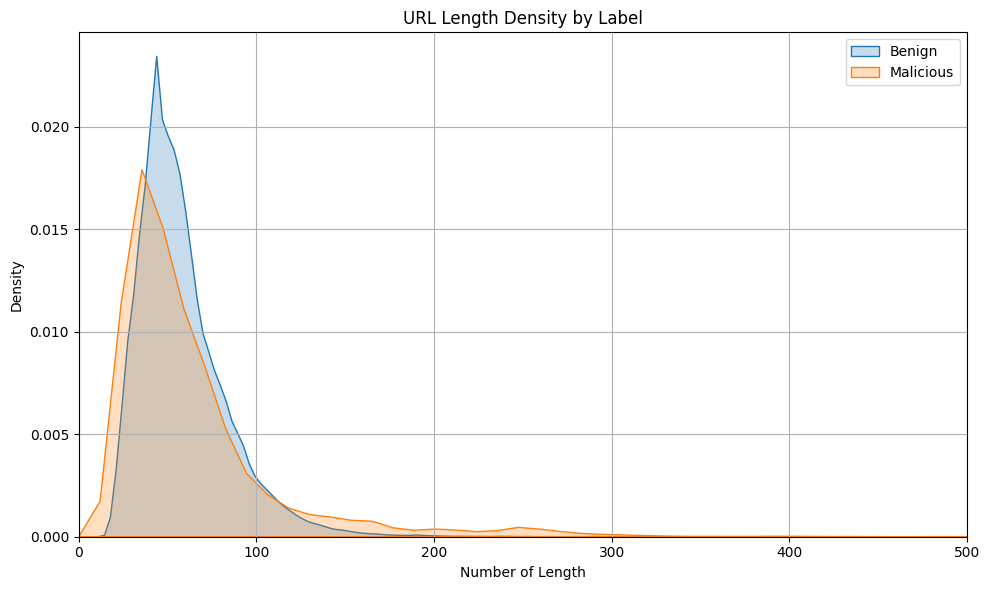

In [50]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['label'] == 'benign']['url_length'], label='Benign', fill=True)
sns.kdeplot(df[df['label'] == 'malicious']['url_length'], label='Malicious', fill=True)

plt.title('URL Length Density by Label')
plt.xlabel('Number of Length')
plt.ylabel('Density')
plt.xlim([0, 500])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

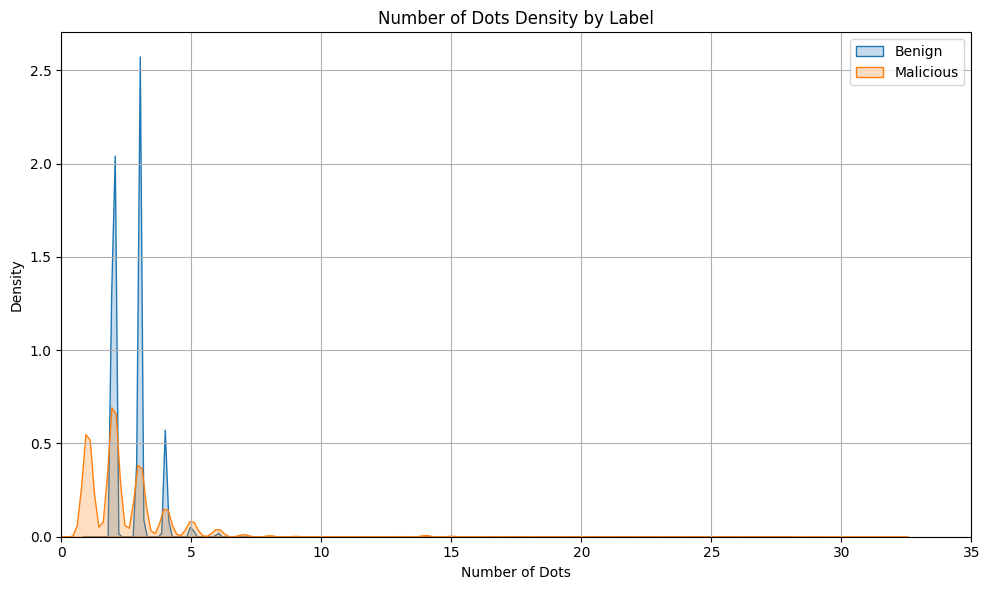

In [51]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['label'] == 'benign']['num_dots'], label='Benign', fill=True)
sns.kdeplot(df[df['label'] == 'malicious']['num_dots'], label='Malicious', fill=True)

plt.title('Number of Dots Density by Label')
plt.xlabel('Number of Dots')
plt.ylabel('Density')
plt.xlim([0, 35])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

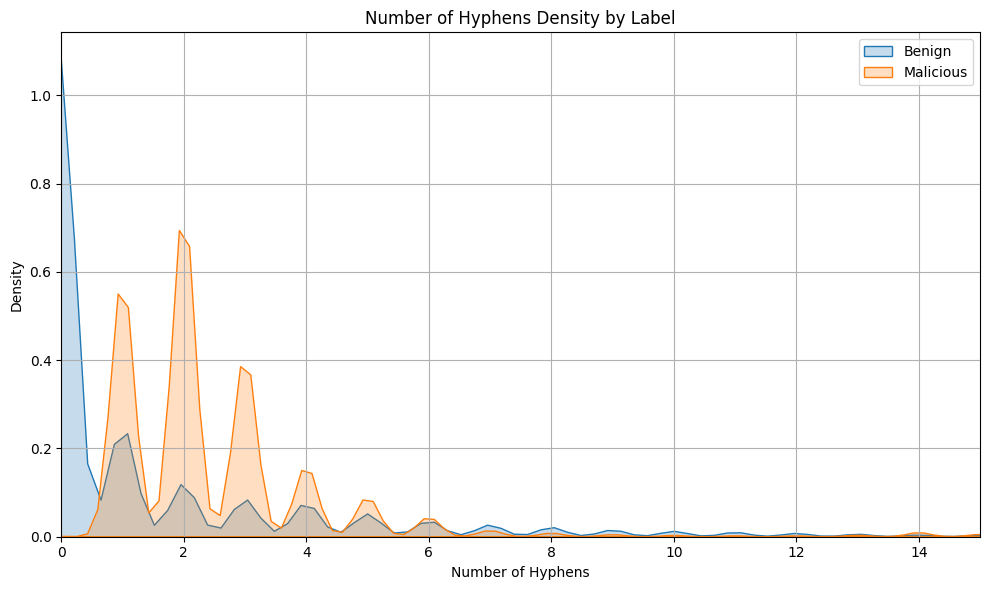

In [52]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['label'] == 'benign']['num_hyphens'], label='Benign', fill=True)
sns.kdeplot(df[df['label'] == 'malicious']['num_dots'], label='Malicious', fill=True)

plt.title('Number of Hyphens Density by Label')
plt.xlabel('Number of Hyphens')
plt.ylabel('Density')
plt.xlim([0, 15])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

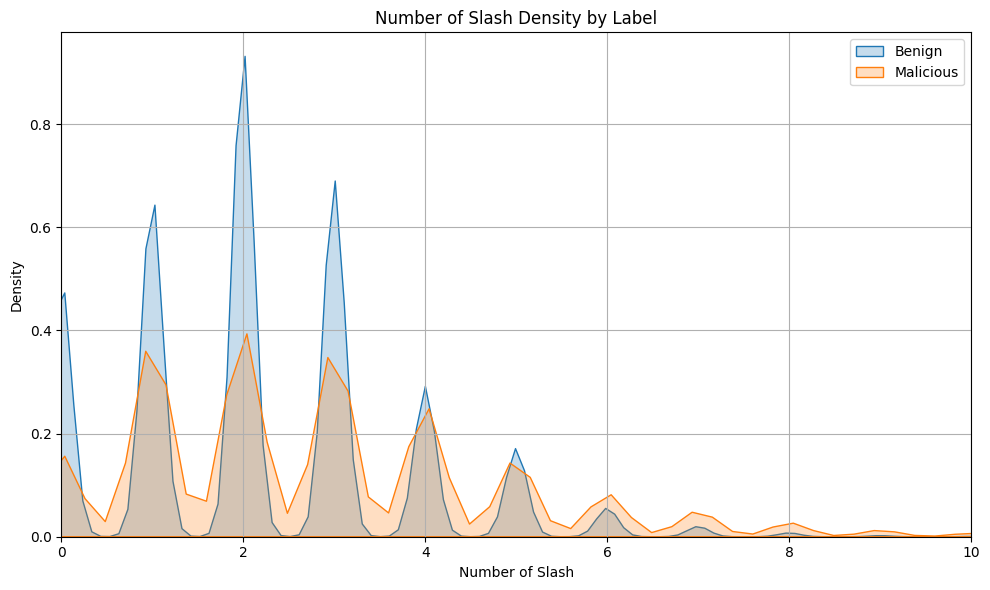

In [53]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['label'] == 'benign']['num_slash'], label='Benign', fill=True)
sns.kdeplot(df[df['label'] == 'malicious']['num_slash'], label='Malicious', fill=True)

plt.title('Number of Slash Density by Label')
plt.xlabel('Number of Slash')
plt.ylabel('Density')
plt.xlim([0, 10])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

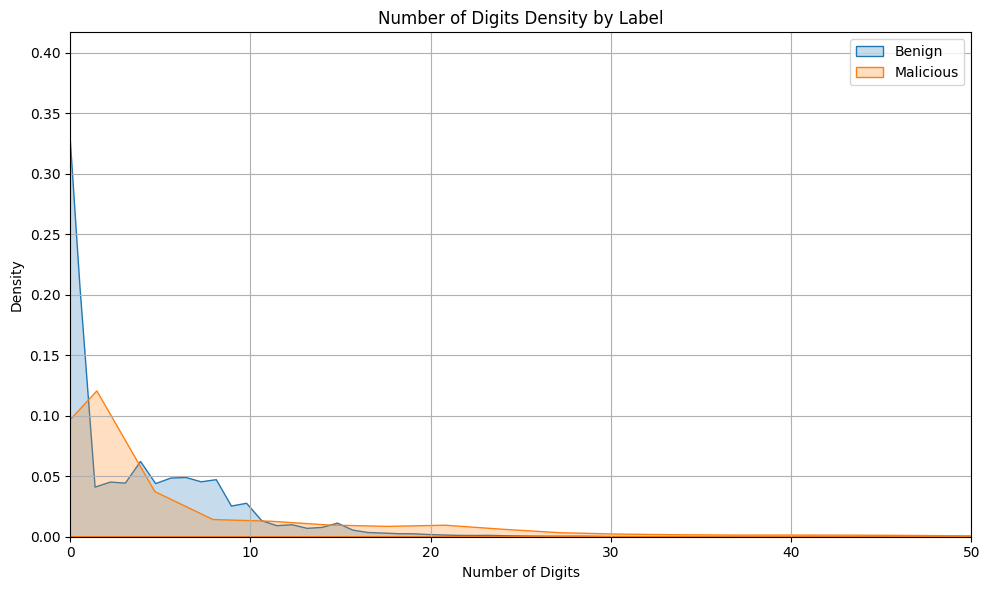

In [54]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['label'] == 'benign']['num_digits'], label='Benign', fill=True)
sns.kdeplot(df[df['label'] == 'malicious']['num_digits'], label='Malicious', fill=True)

plt.title('Number of Digits Density by Label')
plt.xlabel('Number of Digits')
plt.ylabel('Density')
plt.xlim([0, 50])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_10312\3607465053.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


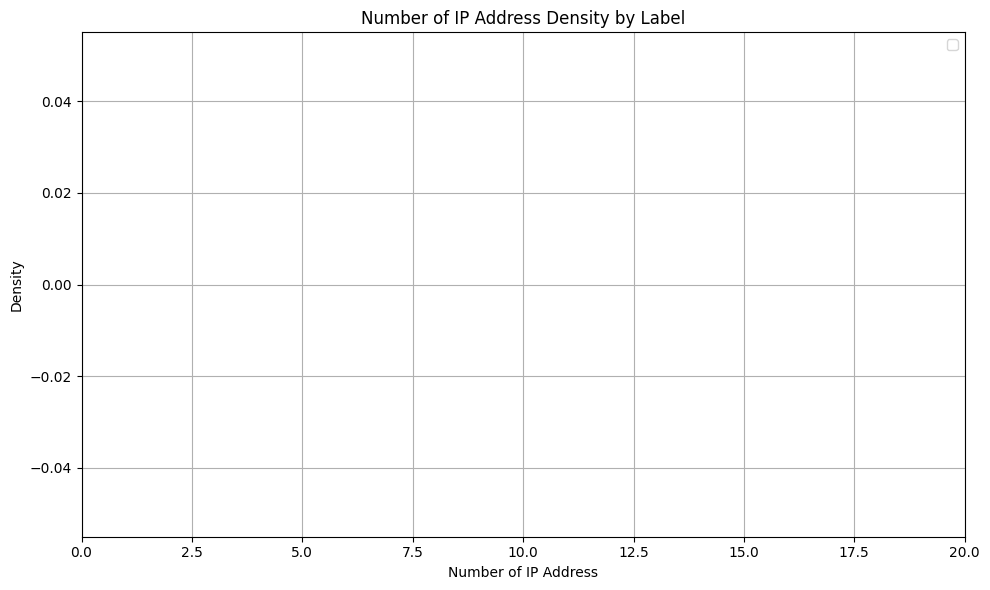

In [55]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['label'] == 'benign']['has_ip_address'], label='Benign', fill=True, warn_singular=False)
sns.kdeplot(df[df['label'] == 'malicious']['has_ip_address'], label='Malicious', fill=True, warn_singular=False)

plt.title('Number of IP Address Density by Label')
plt.xlabel('Number of IP Address')
plt.ylabel('Density')
plt.xlim([0, 20])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

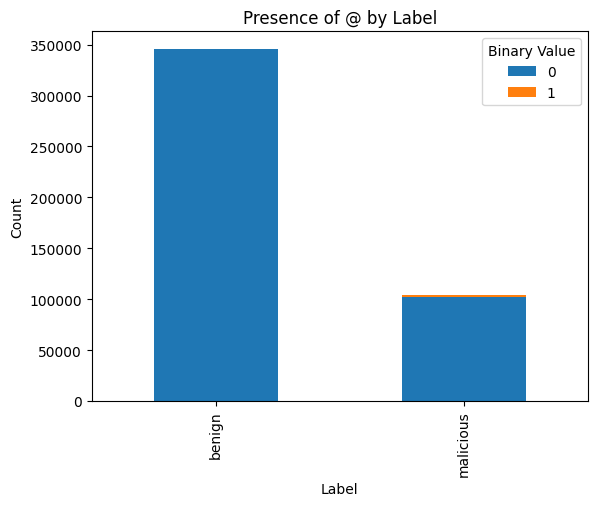

In [56]:
binary_counts = df.groupby(['label', 'presence_of_a']).size().unstack()

binary_counts.plot(kind='bar', stacked=True)
plt.title("Presence of @ by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Binary Value")
plt.show()


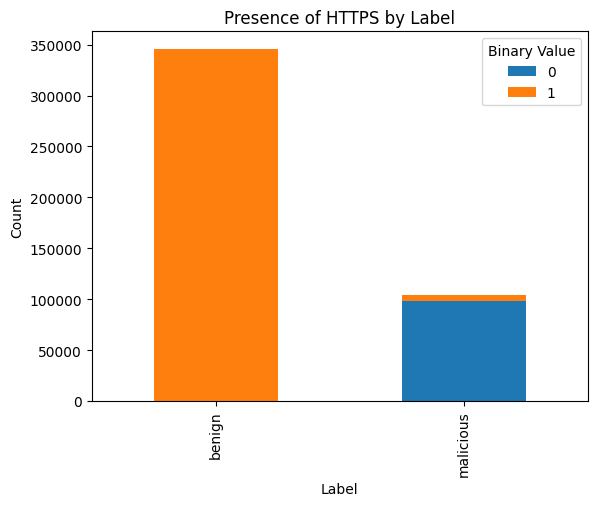

In [57]:
binary_counts = df.groupby(['label', 'uses_https']).size().unstack()

binary_counts.plot(kind='bar', stacked=True)
plt.title("Presence of HTTPS by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Binary Value")
plt.show()


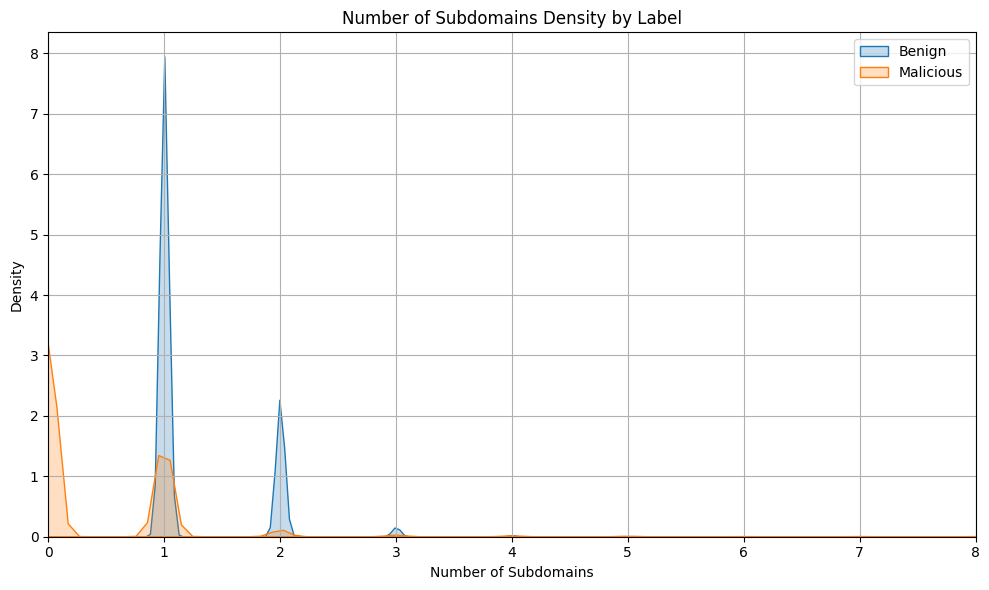

In [58]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['label'] == 'benign']['num_subdomains'], label='Benign', fill=True)
sns.kdeplot(df[df['label'] == 'malicious']['num_subdomains'], label='Malicious', fill=True)

plt.title('Number of Subdomains Density by Label')
plt.xlabel('Number of Subdomains')
plt.ylabel('Density')
plt.xlim([0, 8])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

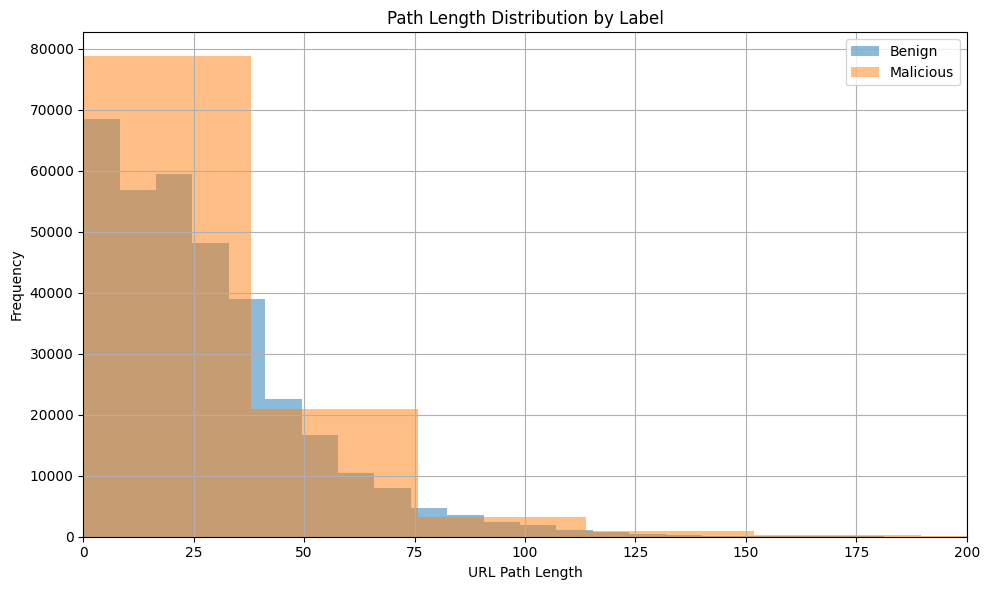

In [59]:
plt.figure(figsize=(10, 6))

#Histogram for benign
df[df['label'] == 'benign']['path_length'].plot(kind='hist', bins=50, alpha=0.5, label='Benign')

#Histogram for malicious
df[df['label'] == 'malicious']['path_length'].plot(kind='hist', bins=50, alpha=0.5, label='Malicious')

plt.title('Path Length Distribution by Label')
plt.xlabel('URL Path Length')
plt.ylabel('Frequency')
plt.xlim([0, 200])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

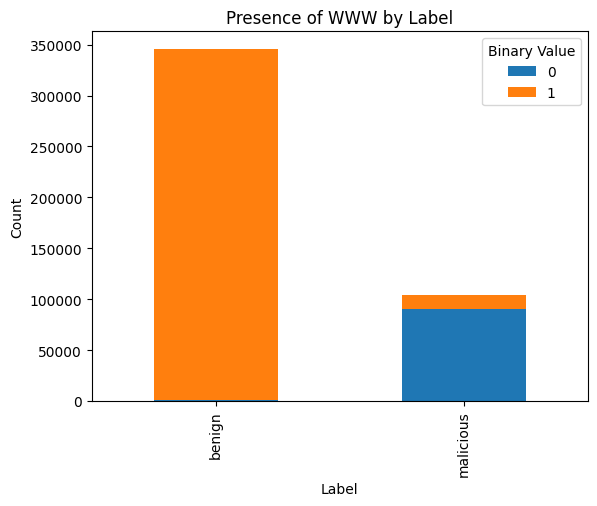

In [60]:
binary_counts = df.groupby(['label', 'presence_of_www']).size().unstack()

binary_counts.plot(kind='bar', stacked=True)
plt.title("Presence of WWW by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Binary Value")
plt.show()


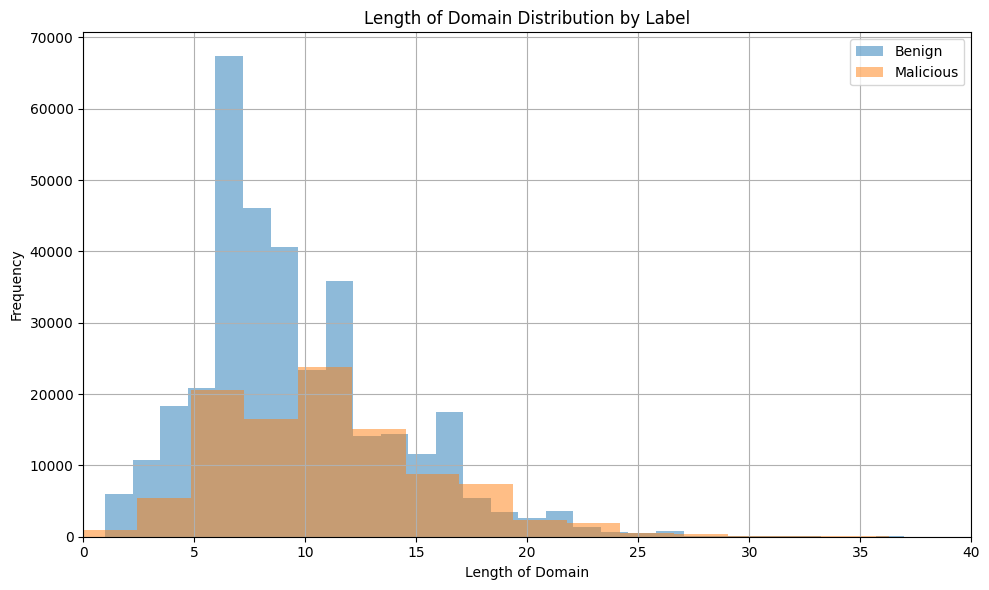

In [61]:
plt.figure(figsize=(10, 6))

#Histogram for benign
df[df['label'] == 'benign']['length_of_domain'].plot(kind='hist', bins=50, alpha=0.5, label='Benign')

#Histogram for malicious
df[df['label'] == 'malicious']['length_of_domain'].plot(kind='hist', bins=50, alpha=0.5, label='Malicious')

plt.title('Length of Domain Distribution by Label')
plt.xlabel('Length of Domain')
plt.ylabel('Frequency')
plt.xlim([0, 40])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

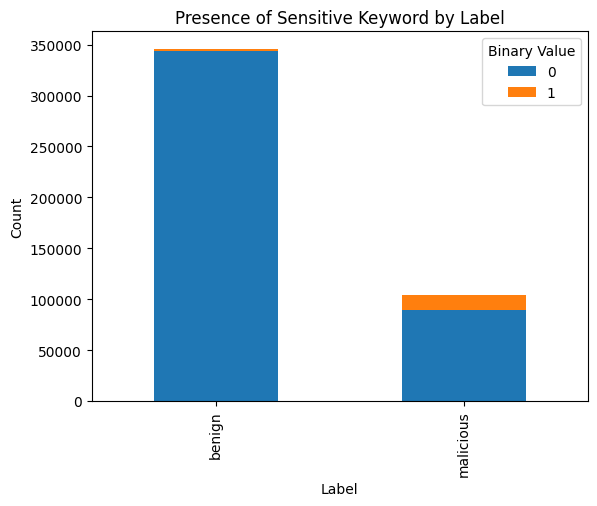

In [62]:
binary_counts = df.groupby(['label', 'has_sensitive_keyword']).size().unstack()

binary_counts.plot(kind='bar', stacked=True)
plt.title("Presence of Sensitive Keyword by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Binary Value")
plt.show()


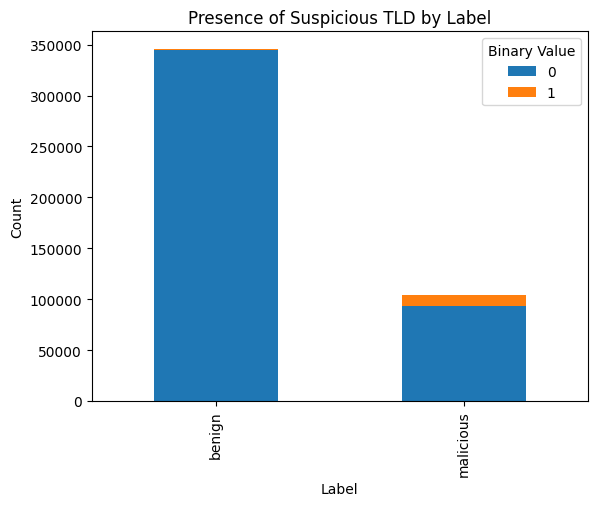

In [63]:
binary_counts = df.groupby(['label', 'suspicious_tld']).size().unstack()

binary_counts.plot(kind='bar', stacked=True)
plt.title("Presence of Suspicious TLD by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Binary Value")
plt.show()


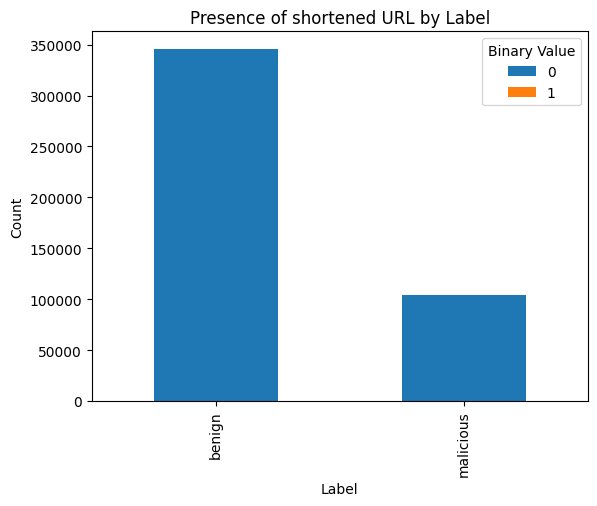

In [64]:
binary_counts = df.groupby(['label', 'is_shortened']).size().unstack()

binary_counts.plot(kind='bar', stacked=True)
plt.title("Presence of shortened URL by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Binary Value")
plt.show()


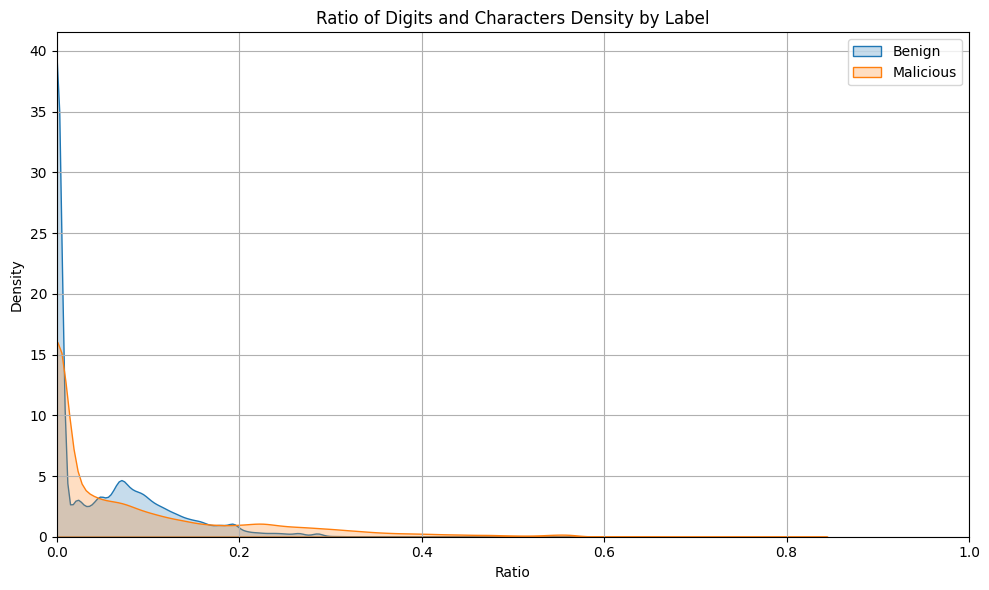

In [65]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['label'] == 'benign']['digit_to_char_ratio'], label='Benign', fill=True)
sns.kdeplot(df[df['label'] == 'malicious']['digit_to_char_ratio'], label='Malicious', fill=True)

plt.title('Ratio of Digits and Characters Density by Label')
plt.xlabel('Ratio')
plt.ylabel('Density')
plt.xlim([0, 1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

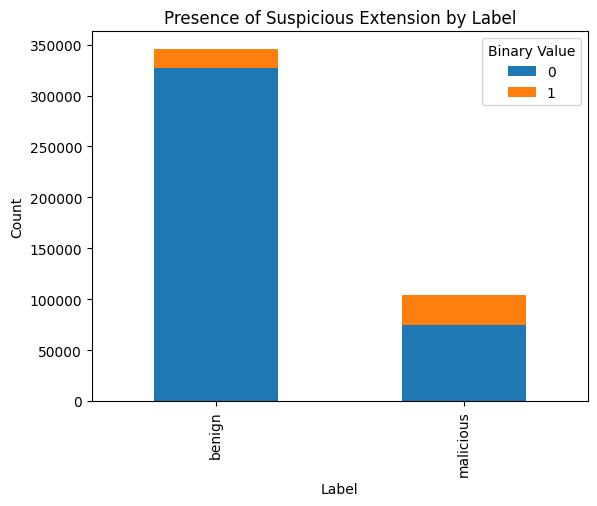

In [66]:
binary_counts = df.groupby(['label', 'suspicious_extension']).size().unstack()

binary_counts.plot(kind='bar', stacked=True)
plt.title("Presence of Suspicious Extension by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Binary Value")
plt.show()


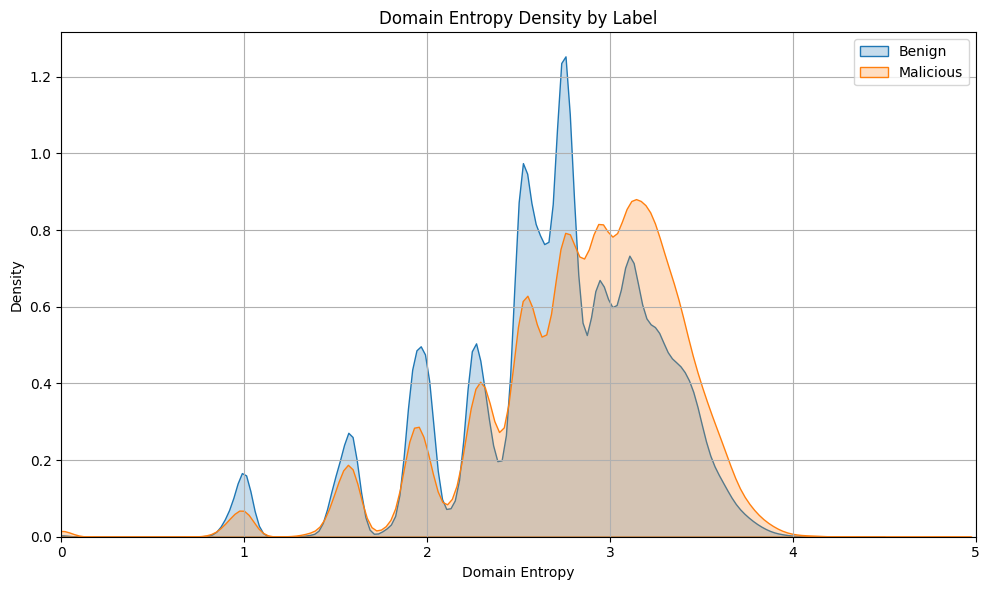

In [67]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['label'] == 'benign']['domain_entropy'], label='Benign', fill=True)
sns.kdeplot(df[df['label'] == 'malicious']['domain_entropy'], label='Malicious', fill=True)

plt.title('Domain Entropy Density by Label')
plt.xlabel('Domain Entropy')
plt.ylabel('Density')
plt.xlim([0, 5])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

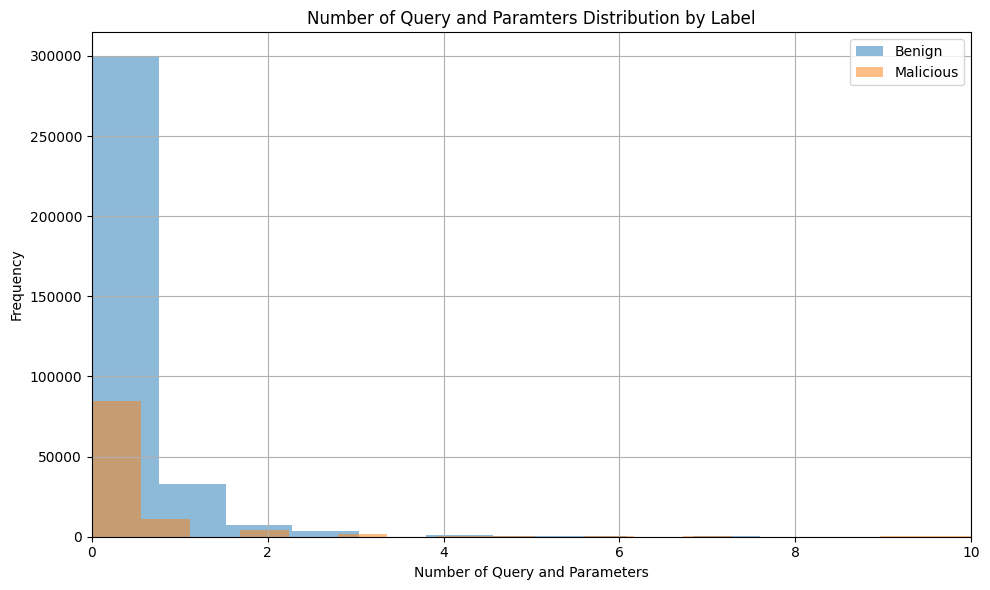

In [68]:
plt.figure(figsize=(10, 6))

#Histogram for benign
df[df['label'] == 'benign']['num_query_parameters'].plot(kind='hist', bins=50, alpha=0.5, label='Benign')

#Histogram for malicious
df[df['label'] == 'malicious']['num_query_parameters'].plot(kind='hist', bins=50, alpha=0.5, label='Malicious')

plt.title('Number of Query and Paramters Distribution by Label')
plt.xlabel('Number of Query and Parameters')
plt.ylabel('Frequency')
plt.xlim([0, 10])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

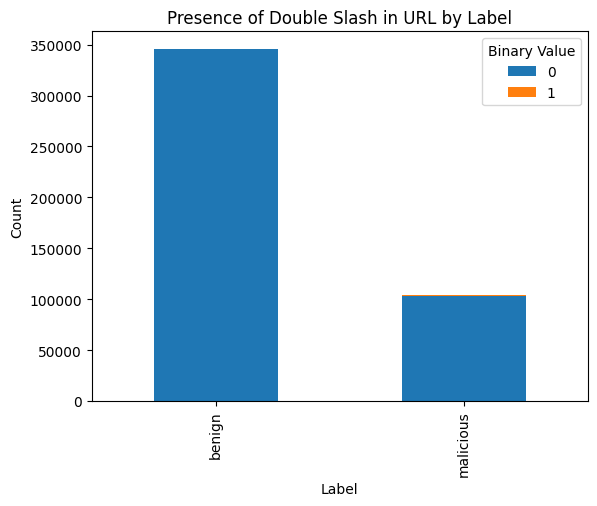

In [69]:
binary_counts = df.groupby(['label', 'has_double_slash']).size().unstack()

binary_counts.plot(kind='bar', stacked=True)
plt.title("Presence of Double Slash in URL by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Binary Value")
plt.show()


<h1 style="color:black">5. Model Training</h1>

In [70]:
x = df[["url_length", "num_dots", "num_hyphens", "num_slash", "num_digits", "has_ip_address", "presence_of_a", "uses_https", 
        "num_subdomains", "path_length", "presence_of_www", "length_of_domain",  "has_sensitive_keyword", "suspicious_tld",
        "is_shortened", "digit_to_char_ratio", "suspicious_extension",  "domain_entropy", "num_query_parameters", "has_double_slash"]]

In [71]:
y = df["result"]

In [72]:
x.shape

(450176, 20)

In [73]:
y.shape

(450176,)

In [74]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
450171    1
450172    1
450173    1
450174    1
450175    1
Name: result, Length: 450176, dtype: int64


In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(len(X_test))

135053


In [88]:
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20)
rf.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)
print(f"\n⏱️ Training completed in {int(minutes)} min {seconds:.4f} sec.")


⏱️ Training completed in 0 min 21.9487 sec.


<h1 style="color:black">6. Confusion Matrix</h1>

In [89]:
y_pred = rf.predict(X_test)

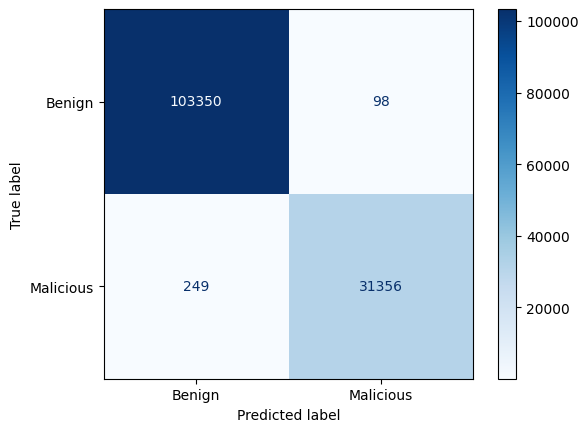

In [90]:
cm = confusion_matrix(y_test, y_pred)

# Create the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malicious"])
fig, ax = plt.subplots()
disp.plot(cmap="Blues", ax=ax, values_format=".0f")  # <- This disables scientific notation

plt.show()

In [91]:
rfreport = classification_report(y_test, y_pred, target_names=["Benign", "Malicious"], digits=4, output_dict=True)
print(classification_report(y_test, y_pred, target_names=["Benign", "Malicious"], digits=4))

              precision    recall  f1-score   support

      Benign     0.9976    0.9991    0.9983    103448
   Malicious     0.9969    0.9921    0.9945     31605

    accuracy                         0.9974    135053
   macro avg     0.9972    0.9956    0.9964    135053
weighted avg     0.9974    0.9974    0.9974    135053



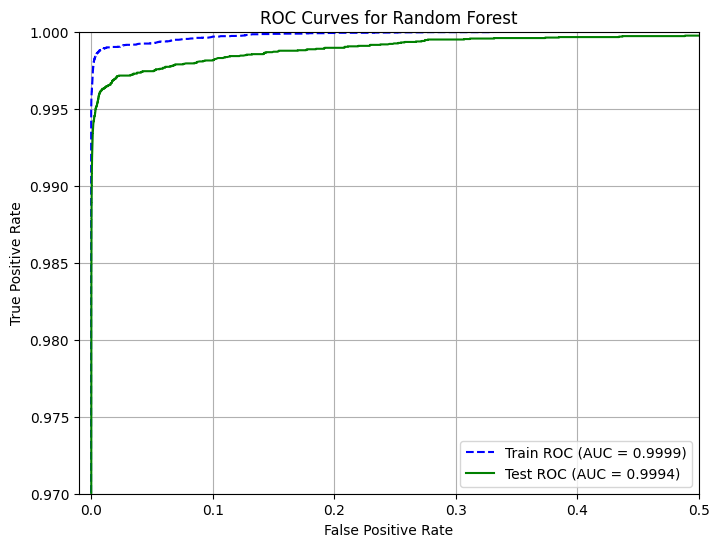

In [92]:
from sklearn.metrics import roc_curve, auc

y_train_proba = rf.predict_proba(X_train)[:, 1]
y_test_proba = rf.predict_proba(X_test)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.4f})', linestyle='--', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.4f})', color='green')

plt.plot([0, 1], [0, 1], 'k--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(0.97, 1)
plt.xlim(-0.01, 0.5)
plt.show()

In [93]:
fea = ["url_length", "num_dots", "num_hyphens", "num_slash", "num_digits", "has_ip_address", "presence_of_a", "uses_https", "num_subdomains", "path_length", "presence_of_www", "length_of_domain",  "has_sensitive_keyword", "suspicious_tld", "is_shortened", "digit_to_char_ratio", "suspicious_extension",  "domain_entropy", "num_query_parameters", "has_double_slash"]
importances = rf.feature_importances_

# Store as 2x20 list (each row is [importance, feature name])
importance_array = [[round(float(importances[i]), 4), fea[i]] for i in range(20)]

# Example: print the array
importance_array_sorted = sorted(importance_array, key=lambda x: x[0], reverse=True)

# Example: print sorted result
for row in importance_array_sorted:
    print(row)

[0.4338, 'uses_https']
[0.2971, 'presence_of_www']
[0.137, 'num_subdomains']
[0.0575, 'num_dots']
[0.0184, 'suspicious_extension']
[0.0165, 'has_sensitive_keyword']
[0.0072, 'num_digits']
[0.0068, 'suspicious_tld']
[0.0049, 'digit_to_char_ratio']
[0.0042, 'num_slash']
[0.0041, 'url_length']
[0.0032, 'domain_entropy']
[0.0029, 'length_of_domain']
[0.0022, 'path_length']
[0.0019, 'num_hyphens']
[0.0011, 'num_query_parameters']
[0.0008, 'has_double_slash']
[0.0005, 'presence_of_a']
[0.0001, 'is_shortened']
[0.0, 'has_ip_address']


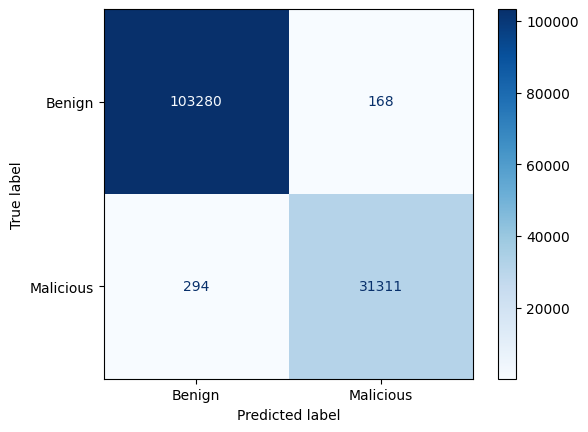

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=20)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Create the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malicious"])
fig, ax = plt.subplots()
disp.plot(cmap="Blues", ax=ax, values_format=".0f")  # <- This disables scientific notation

plt.show()

In [95]:
dtreport = classification_report(y_test, y_pred, target_names=["Benign", "Malicious"], digits=4, output_dict=True)
print(classification_report(y_test, y_pred, target_names=["Benign", "Malicious"], digits=4))

              precision    recall  f1-score   support

      Benign     0.9972    0.9984    0.9978    103448
   Malicious     0.9947    0.9907    0.9927     31605

    accuracy                         0.9966    135053
   macro avg     0.9959    0.9945    0.9952    135053
weighted avg     0.9966    0.9966    0.9966    135053



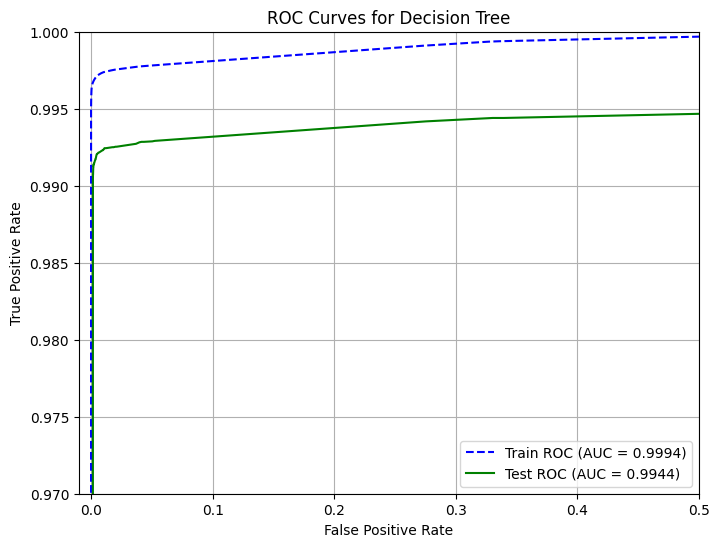

In [97]:
from sklearn.metrics import roc_curve, auc

y_train_proba = dt.predict_proba(X_train)[:, 1]
y_test_proba = dt.predict_proba(X_test)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.4f})', linestyle='--', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.4f})', color='green')

plt.plot([0, 1], [0, 1], 'k--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(0.97, 1)
plt.xlim(-0.01, 0.5)
plt.show()

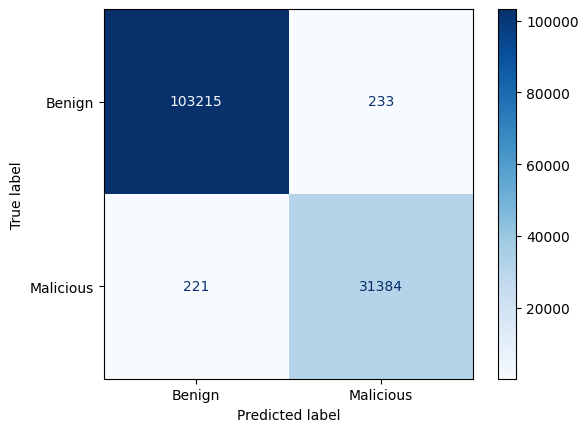

In [98]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000, n_jobs=-1)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Create the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malicious"])
fig, ax = plt.subplots()
disp.plot(cmap="Blues", ax=ax, values_format=".0f")  # <- This disables scientific notation

plt.show()

In [99]:
lrreport = classification_report(y_test, y_pred, target_names=["Benign", "Malicious"], digits=4, output_dict=True)
print(classification_report(y_test, y_pred, target_names=["Benign", "Malicious"], digits=4))

              precision    recall  f1-score   support

      Benign     0.9979    0.9977    0.9978    103448
   Malicious     0.9926    0.9930    0.9928     31605

    accuracy                         0.9966    135053
   macro avg     0.9952    0.9954    0.9953    135053
weighted avg     0.9966    0.9966    0.9966    135053



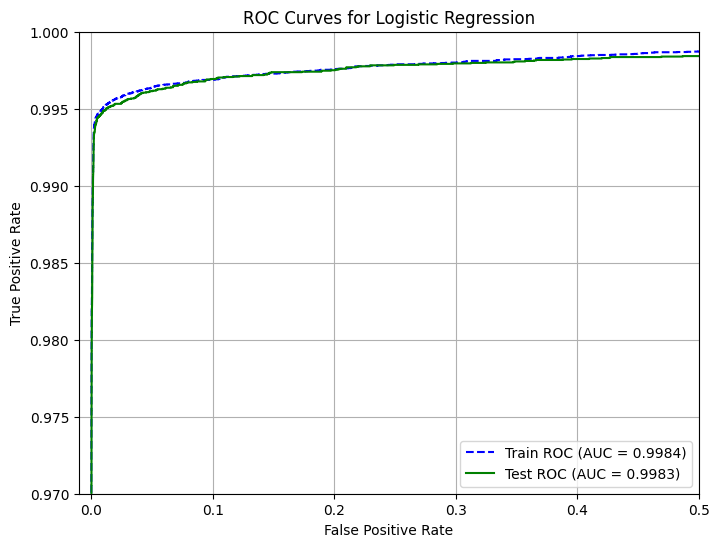

In [100]:
from sklearn.metrics import roc_curve, auc

y_train_proba = LR.predict_proba(X_train)[:, 1]
y_test_proba = LR.predict_proba(X_test)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.4f})', linestyle='--', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.4f})', color='green')

plt.plot([0, 1], [0, 1], 'k--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(0.97, 1)
plt.xlim(-0.01, 0.5)
plt.show()

======================================================================================================

In [86]:
metrics = ['precision', 'recall', 'f1-score']
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
data = []

for model_name, report in zip(models, [rfreport, dtreport, lrreport]):
    row = [model_name,
           report['accuracy'],
           report['weighted avg']['precision'],
           report['weighted avg']['recall'],
           report['weighted avg']['f1-score']]
    data.append(row)

df_metrics = pd.DataFrame(data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

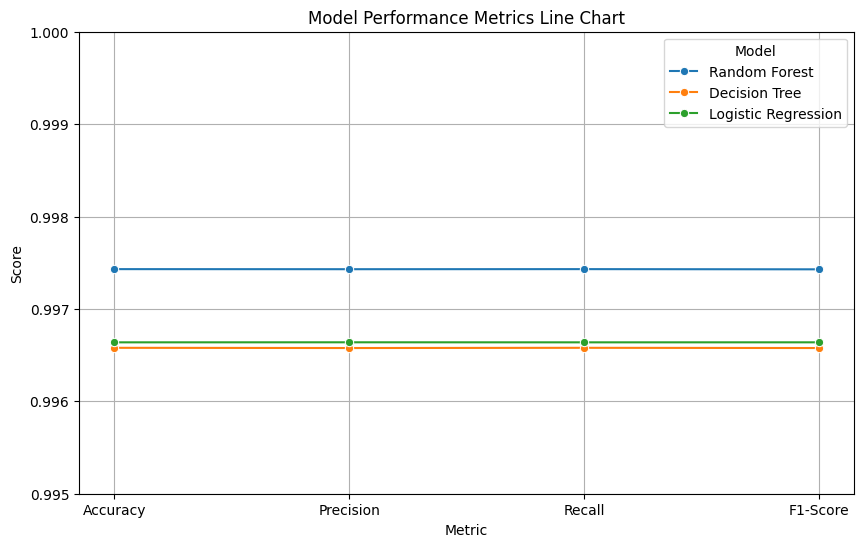

In [87]:
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10,6))
sns.lineplot(data=df_melted, x='Metric', y='Score', hue='Model', marker='o')
plt.title('Model Performance Metrics Line Chart')
plt.ylim(0.9950, 1)
plt.grid(True)
plt.show()

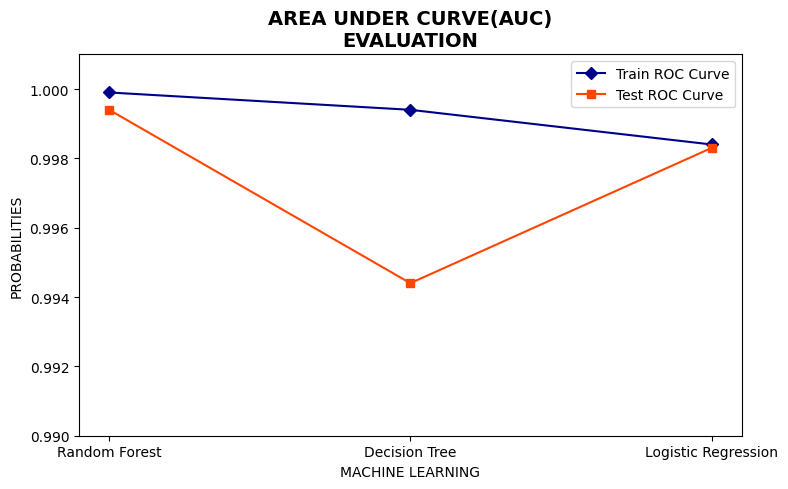

In [104]:
import matplotlib.pyplot as plt

# Sample data
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
train_auc = [0.9999, 0.9994, 0.9984]
test_auc = [0.9994, 0.9944, 0.9983]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(models, train_auc, marker='D', linestyle='-', color='darkblue', label='Train ROC Curve')
plt.plot(models, test_auc, marker='s', linestyle='-', color='orangered', label='Test ROC Curve')

# Title and labels
plt.title('AREA UNDER CURVE(AUC)\nEVALUATION', fontsize=14, fontweight='bold')
plt.xlabel('MACHINE LEARNING', fontsize=10)
plt.ylabel('PROBABILITIES', fontsize=10)

# Y-axis limits
plt.ylim(0.990, 1.001)

# Grid and legend
plt.grid(False)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


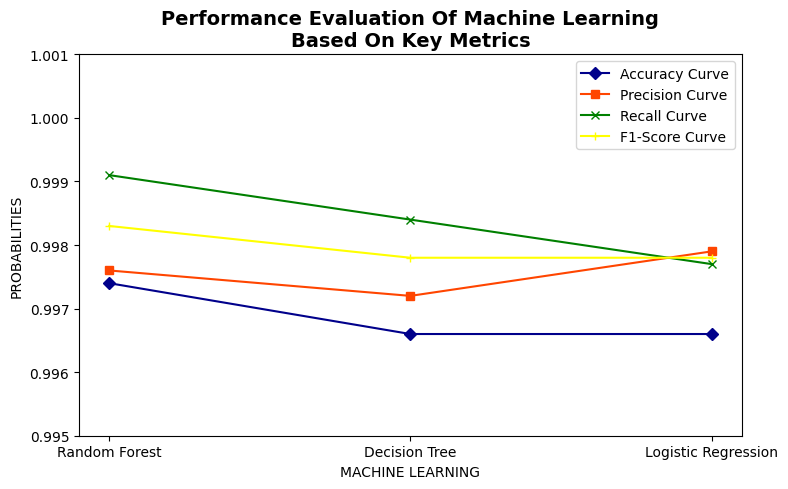

In [107]:
import matplotlib.pyplot as plt

# Sample data
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
Accuracy = [0.9974, 0.9966, 0.9966]
Precision = [0.9976, 0.9972, 0.9979]
Recall = [0.9991, 0.9984, 0.9977]
F1Score = [0.9983, 0.9978, 0.9978]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(models, Accuracy, marker='D', linestyle='-', color='darkblue', label='Accuracy Curve')
plt.plot(models, Precision, marker='s', linestyle='-', color='orangered', label='Precision Curve')
plt.plot(models, Recall, marker='x', linestyle='-', color='green', label='Recall Curve')
plt.plot(models, F1Score, marker='+', linestyle='-', color='yellow', label='F1-Score Curve')

# Title and labels
plt.title('Performance Evaluation Of Machine Learning\nBased On Key Metrics', fontsize=14, fontweight='bold')
plt.xlabel('MACHINE LEARNING', fontsize=10)
plt.ylabel('PROBABILITIES', fontsize=10)

# Y-axis limits
plt.ylim(0.995, 1.001)

# Grid and legend
plt.grid(False)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()